#### <p style="text-align: center;">EE 381V: Statistical Machine Learning</p>
# <p style="text-align: center;">Homework 3: Programming Assignments</p>
## <p style="text-align: center;">Total points: 85  </p>
## <p style="text-align: center;">Due: April 5 by 11:59 pm (submission via Gradescope)</p>

Ideally, your solution to the assignments should be written in and submitted as a **Jupyter notebook**. Please make sure your code runs and the graphics (along with anything else that you want to be considered) are displayed in your notebook before submitting.

For the theoretical parts of the questions below (e.g., computation of gradients), the most convenient approach is to type the solution in the provided spaces ("Markdown" cells) using LaTeX (if not familiar with LaTeX, please check the markdown cells below stating questions for examples of writing equations in LaTeX). Alternatively, you could write down the solution on paper and submit a pdf file of the scan/photo.

# <font color='blue'> Problem 1: Random Forest (22 pts) </font>

The goal of this problem is to explore the effect of feature selection using dataset 'loan.csv'.

Select the `loan_status` column as the target column.  


**Part 1: (4 pts)** Split the dataset into train and test set with 25% data in test set and random_state = 42. Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Print the total number of features.

**Part 2: (4 pts)** Use the dataset to create a `RandomForestClassifier(n_estimators=5, random_state=42)` model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to show the precision, recall and F1 score based on the test set.  


**Part 3: (4 pts)** Use $\chi^2$ test to select the top 100, 30 and 10 features using [SelectKBest](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) module. Train a random forest model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for each of the trained models.  

**Note:** $\chi^2$ test requires non-negative values only for all features. Since we have performed Min-Max scaling previously (where the default behavior is to scale features between 0 and 1, there should not be any problem performing this test.)   

**Part 4: (5 pts)** [Plot the ROC curves](https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/21_plot_roc_curve.ipynb) for all of the 4 models.  

**Part 5: (5 pts)** Plot the feature importance for each of the 4 random forest models that you have trained to show the top 5 features. ([Get feature names after feature selection](https://stackoverflow.com/a/43765224), [Plot feature importance using Pandas and matplotlib](https://stackoverflow.com/a/51520906))

In [ ]:
# Adding this cell to upload loan file from canvas
from google.colab import files
uploaded = files.upload()

Saving loan.csv to loan.csv


In [ ]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util',
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)
df.head()

<ipython-input-6-e5e40a09f5ea>:7: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('loan.csv')


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2018,last_pymnt_d_Nov-2018,last_pymnt_d_Oct-2018,last_pymnt_d_Sep-2018,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500,2500,2500.0,13.56,84.92,55000.0,1,18.24,9.0,1.0,...,1,0,0,0,0,0,1,0,1,0
1,30000,30000,30000.0,18.94,777.23,90000.0,1,26.52,13.0,1.0,...,1,0,0,0,0,0,1,0,1,0
2,5000,5000,5000.0,17.97,180.69,59280.0,1,10.51,8.0,0.0,...,1,0,0,0,0,0,1,0,1,0
3,4000,4000,4000.0,18.94,146.51,92000.0,1,16.74,10.0,0.0,...,1,0,0,0,0,0,1,0,1,0
4,30000,30000,30000.0,16.14,731.78,57250.0,1,26.35,12.0,0.0,...,1,0,0,0,0,0,1,0,1,0


### Your answer:

#### Part 1 (**4 pts**)

In [ ]:
# Select the loan_status column as the target column.
Y = df.pop('loan_status')
Y

0         1
1         1
2         1
3         1
4         1
         ..
226062    1
226063    1
226064    1
226065    1
226066    1
Name: loan_status, Length: 226067, dtype: int64

In [ ]:
# fit and scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.03846154, 0.03846154, 0.04519414, ..., 0.        , 1.        ,
        0.        ],
       [0.74358974, 0.74358974, 0.74538511, ..., 0.        , 1.        ,
        0.        ],
       [0.1025641 , 0.1025641 , 0.10884787, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.30769231, 0.30769231, 0.31253978, ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.23076923, 0.23615532, ..., 0.        , 1.        ,
        0.        ],
       [0.35897436, 0.35897436, 0.36346276, ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
# generate train test split with 25% test data and 42 random state
df_scaled_train, df_scaled_test, y_train, y_test = train_test_split(df_scaled, Y, test_size=0.25, random_state=42)

In [ ]:
print("The total number of features is: {}".format(df_scaled.shape[1]))

The total number of features is: 160


#### Part 2 (**4 pts**)

In [ ]:
# make a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfClassifier = RandomForestClassifier(n_estimators=5, random_state=42)
rfClassifier_trained = rfClassifier.fit(df_scaled_train, y_train)

In [ ]:
y_predicted = rfClassifier_trained.predict(df_scaled_test)

In [ ]:
# make a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.63      0.37      0.46       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.81      0.68      0.73     56517
weighted avg       0.98      0.99      0.99     56517



#### Part 3-5: **14 pts**


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# PART 3:
# select 100 best features
selector100 = SelectKBest(chi2, k=100)
df_scaled_train_top100 = selector100.fit_transform(df_scaled_train, y_train)
df_scaled_test_top100 = selector100.fit_transform(df_scaled_test, y_test)

In [ ]:
df_scaled_train_top100.shape

(169550, 100)

In [ ]:
# select 30 best features
selector30 = SelectKBest(chi2, k=30)
df_scaled_train_top30 = selector30.fit_transform(df_scaled_train, y_train)
df_scaled_test_top30 = selector30.fit_transform(df_scaled_test, y_test)

In [ ]:
df_scaled_train_top30.shape

(169550, 30)

In [ ]:
# select 10 best features
selector10 = SelectKBest(chi2, k=10)
df_scaled_train_top10 = selector10.fit_transform(df_scaled_train, y_train)
df_scaled_test_top10 = selector10.fit_transform(df_scaled_test, y_test)

In [ ]:
df_scaled_train_top10.shape

(169550, 10)

In [ ]:
# Train a random forest classifier for each subset of features and print classification report.
# 100:
rfClassifier100 = RandomForestClassifier(n_estimators=5, random_state=42)
rfClassifier_trained100 = rfClassifier100.fit(df_scaled_train_top100, y_train)
y_predicted100 = rfClassifier_trained100.predict(df_scaled_test_top100)

In [ ]:
print(classification_report(y_test, y_predicted100))

              precision    recall  f1-score   support

           0       0.02      0.14      0.03       850
           1       0.98      0.86      0.92     55667

    accuracy                           0.85     56517
   macro avg       0.50      0.50      0.47     56517
weighted avg       0.97      0.85      0.90     56517



In [ ]:
# 30
rfClassifier30 = RandomForestClassifier(n_estimators=5, random_state=42)
rfClassifier_trained30 = rfClassifier30.fit(df_scaled_train_top30, y_train)
y_predicted30 = rfClassifier_trained30.predict(df_scaled_test_top30)

In [ ]:
print(classification_report(y_test, y_predicted30))

              precision    recall  f1-score   support

           0       0.48      0.15      0.23       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.98     56517
   macro avg       0.73      0.57      0.61     56517
weighted avg       0.98      0.98      0.98     56517



In [ ]:
# 10
rfClassifier10 = RandomForestClassifier(n_estimators=5, random_state=42)
rfClassifier_trained10 = rfClassifier10.fit(df_scaled_train_top10, y_train)
y_predicted10 = rfClassifier_trained10.predict(df_scaled_test_top10)

In [ ]:
print(classification_report(y_test, y_predicted10))

              precision    recall  f1-score   support

           0       1.00      0.07      0.14       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.99      0.54      0.56     56517
weighted avg       0.99      0.99      0.98     56517



In [ ]:
# PART 4:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

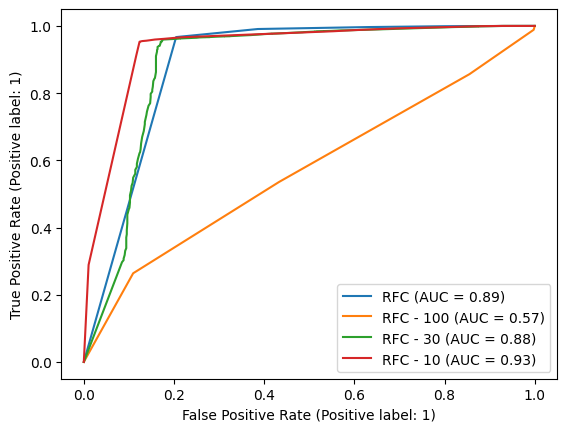

In [ ]:
fig, ax_ = plt.subplots()
RocCurveDisplay.from_estimator(rfClassifier, df_scaled_test, y_test, ax=ax_, name="RFC")
RocCurveDisplay.from_estimator(rfClassifier100, df_scaled_test_top100, y_test, ax=ax_, name="RFC - 100")
RocCurveDisplay.from_estimator(rfClassifier30, df_scaled_test_top30, y_test, ax=ax_, name="RFC - 30")
RocCurveDisplay.from_estimator(rfClassifier10, df_scaled_test_top10, y_test, ax=ax_, name="RFC - 10")
plt.show()

In [ ]:
# PART 5
feature_names = list(df.columns.values)

In [ ]:
mask100 = selector100.get_support() #list of booleans
mask30 = selector30.get_support() #list of booleans
mask10 = selector10.get_support() #list of booleans

In [ ]:
df_scaled_train_named = pd.DataFrame(df_scaled_train, columns=feature_names)

In [ ]:
df_scaled_train_named

In [ ]:
new_features = [] # The list of your K best features
for maskTrue, feature in zip(mask100, feature_names):
    if maskTrue:
        new_features.append(feature)
df_scaled_train_top100_named = pd.DataFrame(df_scaled_train_top100, columns=new_features)

new_features = [] # The list of your K best features
for maskTrue, feature in zip(mask30, feature_names):
    if maskTrue:
        new_features.append(feature)
df_scaled_train_top30_named = pd.DataFrame(df_scaled_train_top30, columns=new_features)

new_features = [] # The list of your K best features
for maskTrue, feature in zip(mask10, feature_names):
    if maskTrue:
        new_features.append(feature)
df_scaled_train_top10_named = pd.DataFrame(df_scaled_train_top10, columns=new_features)

<Axes: title={'center': 'Top 5 features out of 160'}>

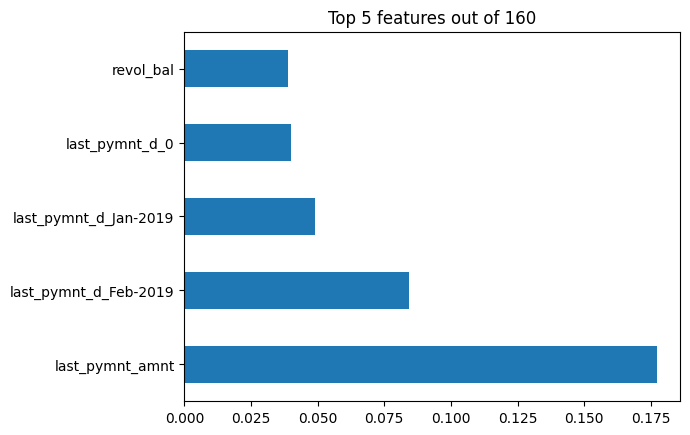

In [ ]:
feat_importances = pd.Series(rfClassifier.feature_importances_, index=df_scaled_train_named.columns)
feat_importances.nlargest(5).plot(kind='barh', title='Top 5 features out of 160')

<Axes: title={'center': 'Top 5 features out of 100'}>

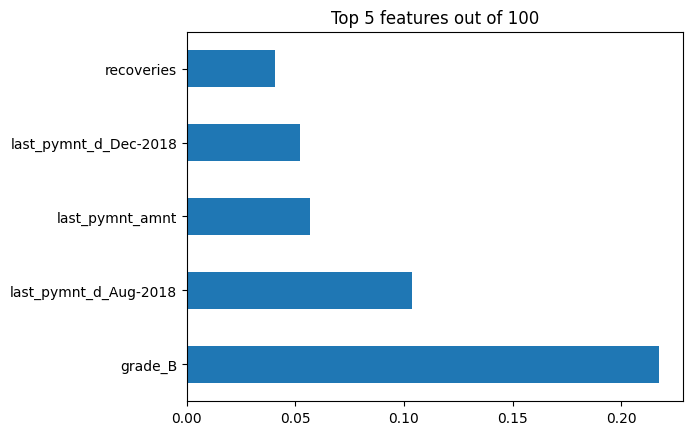

In [ ]:
feat_importances100 = pd.Series(rfClassifier100.feature_importances_, index=df_scaled_train_top100_named.columns)
feat_importances100.nlargest(5).plot(kind='barh', title='Top 5 features out of 100')

<Axes: title={'center': 'Top 5 features out of 30'}>

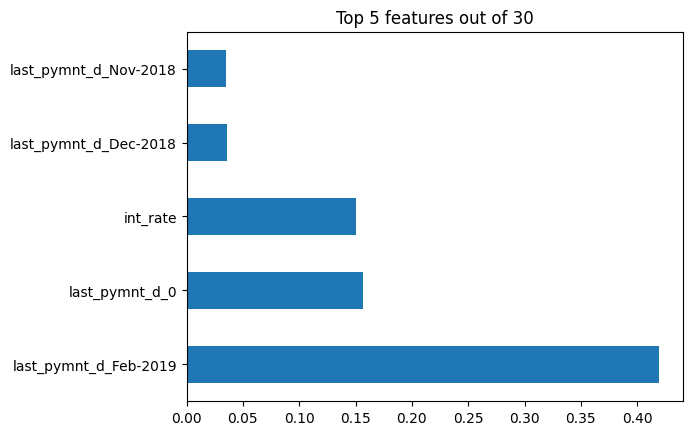

In [ ]:
feat_importances30 = pd.Series(rfClassifier30.feature_importances_, index=df_scaled_train_top30_named.columns)
feat_importances30.nlargest(5).plot(kind='barh', title='Top 5 features out of 30')

<Axes: title={'center': 'Top 5 features out of 10'}>

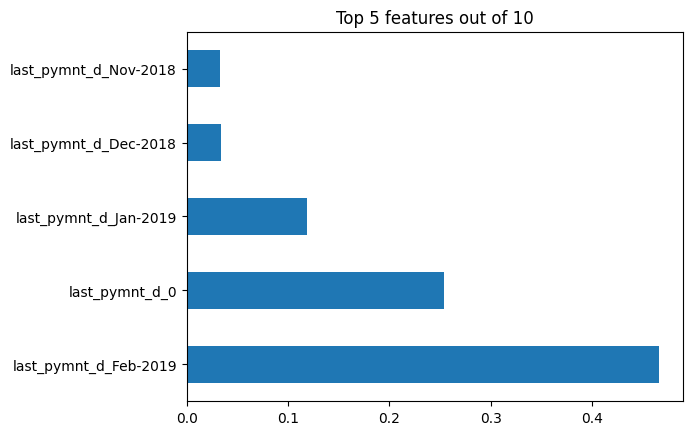

In [ ]:
feat_importances10 = pd.Series(rfClassifier10.feature_importances_, index=df_scaled_train_top10_named.columns)
feat_importances10.nlargest(5).plot(kind='barh', title='Top 5 features out of 10')

# <font color='blue'> Problem 2:  Boosting (26 pts) </font>
In this problem, you are asked to implement AdaBoost with decision stumps (basically, depth-1 decision trees) and apply it to classify data in 'spamdata.mat'. Select the number of boosting rounds $T^{*}$ from $\mathcal{T}=\{100,200, \ldots, 1000\}$; how did you choose this parameter? Plot the errors on the training and test sets as functions of the number of rounds of boosting $t \in\left[1, T^{*}\right]$.
[Note: If you want to write the code from scratch yourself, you do not have to follow the suggested code structure given below.]

**Part 1: Decision Stump (10 pts)**
Adaboost is one of the oldest boosting algorithm, capable of converting an ensemble of weak classifiers into a strong classifier. We will use [Decision Stumps](https://en.wikipedia.org/wiki/Decision_stump) as our base (weak) classifiers.

**Part 2: Adaboost (10 pts)**
This is the same algorithm as we learned in class. You create a new weak learner based on the current sample weights, compute the error of the created weak learner, compute the new learner's weight using the formula $w_{t}=\frac{1}{2} \log \left(\frac{1}{\epsilon_{t}}-1\right)$, and finally update the sample weights. In the next iteration, identify a new weak learner based on the updated sample weights.

**Part 3: Boosting (6 pts)**
Use your Decision Stumps and Adaboost algorithms to run boosting.

### Your answer:

#### Part 1: Decision Stump (10 pts)

In [ ]:
import numpy as np
from operator import lt,ge

class DecisionStump:
    """
    A simple decision stump classifier
    dim : dimension on which to split
    value : value of the dimension
    op : comparator function (either <, <, >= or <=)
    """
    def __init__(self, dim=0, value=0, op=lt):
        self.dim = dim
        self.value = value
        self.op = op

    def update(self, dim=None, value=None, op=None):
        if dim is not None: self.dim = dim
        if value is not None: self.value = value
        if op is not None: self.op = op

    def predict(self,X):
        return np.array([1 if self.op(x, self.value) else -1 for x in X[:,self.dim]])

    """
    Fit a one-dimensional Decision Stump classifier.
    You should identify the dimension which results in the best split and find the corresponding optimal
    feature threshold value.
    To facilitate the search for the optimal splitting dimension, this function is called by the fit_data
    function for every dimension.
    """
    def fit_dim(self,X,Y,sample_weights,num_splits):
        """
        Input:
        X and Y are the input data and labels, respectively.
        sample_weights are the iterated weights (initialized as (1/m,1/m,1/m,...,1/m))
        num_splits is the number of possible threshold values used for splitting the
        data (we discretize possible threshold values, find the optimal one); this value
        should be less than the number of samples for the sake of computational efficiency.

        Return:
        min_err: the minimum classification error
        split_value: the optimal threshold
        op: optimal operator (i.e., either >, <, >=, or <=)
        """
        return min_err,split_value,op

    """
    Finding an optimal splitting dimension and the corresponding feature threshold value
    X : n x d data matrix, n number of samples with d dimension
    Y : n dimensional array containing label of each observation, label = {-1,1}
    sample_weights : weight of each observation
    num_splits : number of split value to be tested randomly

    """
    def fit_data(self,X,Y,sample_weights,num_splits=100):
        """
        Input:
        X and Y are the input data and labels, respectively.
        sample_weights are the iterated weights (initialized as (1/m,1/m,1/m,...,1/m))
        num_splits is the number of possible threshold values used for splitting the
        data (we discretize possible threshold values, find the optimal one); this value
        should be less than the number of samples for the sake of computational efficiency.
        There is no return in this funtion
        you can use update() to assign the optimal value of self.dim, self.value and self.op
        """

#### Part 2: Adaboost (10 pts)

In [ ]:
class Adaboost:
    def __init__(self, n, weak_learners=None, learner_weights=None):
        self.weak_learners = weak_learners if weak_learners is not None else []
        self.learner_weights = learner_weights if learner_weights is not None else []
        self.sample_weights = np.repeat(1/n,n)


    def add_learner(self, X, Y, weak_learner_class = DecisionStump):
        """
        In this function, Adaboost completes one iteration
        Please use the class DecisionStump and its member functions you definted above.

        X : n x d data matrix, n is the number of samples in d dimensions
        Y : n dimensional array containing label of each observation, label in {-1,1}
        weak_learner_class is default: DecisionStump
        Notice: you need to use a list to append all the weak learner objects and their weights here
        """

    def predict(self,X):
         """
        You can use this function to return predicted label using the iterated strong model.
        The current iterated strong model H(t) consists of t weak learners we saved before

        """
        return predictions

    def prediction_error(self,X,Y):
        """
        You can use this function to return the predicted error using the iterated strong model
        """
        return error



#### Part 3: Boosting (6 pts)


In [ ]:
import random
import matplotlib.pyplot as plt
import scipy.io


def plot_results(train_error, test_error):
    """
    Plot error on the training and test set as a function
    of the number of rounds of boosting.
    """

In [ ]:
from sklearn.model_selection import train_test_split
#Read in the dataset
dataFile = 'spamdata.mat'
data = scipy.io.loadmat(dataFile)['spamdata']
X = data[:,0:57]
y = data[:,57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=50)

# normalize data
X_train = np.log(X_train + 0.1 * np.ones((len(X_train), len(X_train[0]))))
X_test = np.log(X_test + 0.1 * np.ones((len(X_test), len(X_test[0]))))
y_train = 2 * y_train - 1
y_test = 2 * y_test - 1

#Maximum number of weak learners to be used in Adaboost
max_num_weak_learners = 1000

#Train and test error
train_error = []
test_error = []

#Training Adaboost with weak learners
n,d = X_train.shape
model = Adaboost(n)
for m in range(1, max_num_weak_learners + 1):
    print("Training Adaboost with weak learners %d" % m)
    model.add_learner(X_train, y_train)
    train_error.append(model.prediction_error(X_train, y_train))
    test_error.append(model.prediction_error(X_test, y_test))

print("Initial Training Error=%.4f Testing Error= %.4f " % (train_error[0], test_error[0]))
print("Final Training Error=%.4f Testing Error= %.4f " % (train_error[-1], test_error[-1]))
plot_results(train_error, test_error)

# <font color='blue'> Problem 3: Comparing different classification ensembles method (22 pts) </font>

In this problem, we will compare performance of different ensemble methods for classification: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [GradientBoosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifiers.

[Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase) of UCI will be used ('spamdata.mat', exactly the same dataset we used in Problem 2).

* Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42.



**Part 1: (5 pts)** Use a Decision Tree Classifier with random_state = 10 and Logistic Regression with random_state = 10 and solver ="lbfgs" for the spam classification problem. Report the accuracy_score and roc_auc_score on the test data for each classifier.


**Part 2: (5 pts)** Create an ensemble of 50 classifiers (i.e., n_estimators = 50) with random_state = 10 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifiers being Decision Tree Classifier and Logistic Regression from part $1$ . Report accuracy_score and roc_auc_score on the test data for both Bagging classifiers. Compare the results and briefly explain the effect of using bagging for the spam classification problem for both the Logistic Regression and Decision Tree base classifiers.

**Part 3: (5 pts)** Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify whether an email is spam. Report your testing accuracy ([accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score). You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score.


**Part 4: (5 pts)** Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem.  Report  accuracy_score and roc_auc_score on the test data for each algorithm.

  Note : For part 3 and 4 find the best values for the hyper parameters of each of the models by using GridSearchCV.


**Part 5: (2 pts)** Briefly explain which of the three ensemble method above from Part 3 & 4 performed the best and why?

### Your answer:

#### Loading and pre-processing dataset

In [ ]:
# Adding this cell to upload spam file from canvas
from google.colab import files
uploaded = files.upload()

Saving spamdata.mat to spamdata.mat


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
import scipy.io


dataFile = 'spamdata.mat'
data = scipy.io.loadmat(dataFile)['spamdata']
x_total = data[:,0:57]
y_total = data[:,57]
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.33, random_state=42)

#### Part 1 (**5 pts**)

In [ ]:
# Part 1: (5 pts) Use a Decision Tree Classifier with random_state = 10 and
# Logistic Regression with random_state = 10 and solver ="lbfgs" for the spam
# classification problem. Report the accuracy_score and roc_auc_score on the
# test data for each classifier.

# Import the models.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create models
DTmodel = DecisionTreeClassifier(random_state=10)
LRmodel = LogisticRegression(max_iter=10000, random_state=10, solver="lbfgs")

In [ ]:
DTmodelTrained = DTmodel.fit(x_train, y_train)


In [ ]:
LRmodelTrained = LRmodel.fit(x_train, y_train)

In [ ]:
y_predict_DT = DTmodelTrained.predict(x_test)

In [ ]:
y_predict_LR = LRmodelTrained.predict(x_test)

In [ ]:
print("Accuracy score Decision Tree Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_DT)))
print("Accuracy score Logistic Regression Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_LR)))

Accuracy score Decision Tree Model: 0.9038841342988808
Accuracy score Logistic Regression Model: 0.9256089532587228


In [ ]:
print("ROC AUC Score Decision Tree Model: {}".format(roc_auc_score(y_test, DTmodelTrained.predict_proba(x_test)[:,1])))
print("ROC AUC Score Logistic Regression Model: {}".format(roc_auc_score(y_test, LRmodelTrained.predict_proba(x_test)[:,1])))

ROC AUC Score Decision Tree Model: 0.903872196513792
ROC AUC Score Logistic Regression Model: 0.9744726150904864


#### Part 2 (**5 pts**)

In [ ]:
# Part 2: (5 pts) Create an ensemble of 50 classifiers (i.e., n_estimators = 50)
# with random_state = 10 for bagging with base classifiers being Decision Tree
# Classifier and Logistic Regression from part  1. Report accuracy_score and
# roc_auc_score on the test data for both Bagging classifiers. Compare the
# results and briefly explain the effect of using bagging for the spam
# classification problem for both the Logistic Regression and Decision Tree
# base classifiers.

from sklearn.ensemble import BaggingClassifier

In [ ]:
DTbaggingModel = BaggingClassifier(estimator=DTmodel, n_estimators=50, random_state=10)

In [ ]:
LRbaggingModel = BaggingClassifier(estimator=LRmodel, n_estimators=50, random_state=10)

In [ ]:
DTbaggingModelTrained = DTbaggingModel.fit(x_train, y_train)
LRbaggingModelTrained = LRbaggingModel.fit(x_train, y_train)

In [ ]:
y_predict_DTBagging = DTbaggingModelTrained.predict(x_test)
y_predict_LRBagging = LRbaggingModelTrained.predict(x_test)
print("Accuracy score Decision Tree Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_DTBagging)))
print("Accuracy score Logistic Regression Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_LRBagging)))

Accuracy score Decision Tree Model: 0.9414088215931534
Accuracy score Logistic Regression Model: 0.9282422646477946


In [ ]:
print("ROC AUC Score Decision Tree Model: {}".format(roc_auc_score(y_test, DTbaggingModelTrained.predict_proba(x_test)[:,1])))
print("ROC AUC Score Logistic Regression Model: {}".format(roc_auc_score(y_test, LRbaggingModelTrained.predict_proba(x_test)[:,1])))

ROC AUC Score Decision Tree Model: 0.9799954014498107
ROC AUC Score Logistic Regression Model: 0.9762233229775431


There is a noticeable improvement in the scores obtained by both models after applying bagging. This can be due to several factors:

- Since bagging uses multiple instances of amodel on different subsets of the data, it reduces the variance of the model and prevents overfitting.

- Bagging helps capture complex relationships in the data by training multiple models on different subsets of data. This is helpful especially for Logistic Regression which is a linear model and can have reduced performance on non-linear relationships in the data. Since we are averaging the results of multiple models, the model deals better with complex data.

- Bagging also helps with noise and outliers in data. Since the models are trained on different subsets of data, the influence of noisy samples is reduced.

- Finally, bagging deals better with imbalanced data because it trains multiple models on different subsets of the data. Therefore, the overall model won't be biased towards the majority class of the entire dataset.

#### Part 3 (**5 pts**)

In [ ]:
# Part 3: (5 pts) Use a Random Forest to classify whether an email is spam.
# Report your testing accuracy (accuracy_score) and roc_auc_score. You will
# need predict_proba for roc_auc_score.

# Showing performance of a model with default parameters first
RFmodel = RandomForestClassifier()

In [ ]:
RFmodelTrained = RFmodel.fit(x_train, y_train)
y_predict_RF = RFmodelTrained.predict(x_test)

In [ ]:
print("Accuracy score Random Forest Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_RF)))
print("ROC AUC Score Random Forest Model: {}".format(roc_auc_score(y_test, RFmodelTrained.predict_proba(x_test)[:,1])))

Accuracy score Random Forest Model: 0.9447004608294931
ROC AUC Score Random Forest Model: 0.9866162274508099


In [ ]:
# Modifying hyper-parameters to match previous models
RFmodel2 = RandomForestClassifier(random_state=10, n_estimators=50)
RFmodelTrained2 = RFmodel.fit(x_train, y_train)
y_predict_RF2 = RFmodelTrained2.predict(x_test)
print("Accuracy score Random Forest Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_RF2)))
print("ROC AUC Score Random Forest Model: {}".format(roc_auc_score(y_test, RFmodelTrained2.predict_proba(x_test)[:,1])))

Accuracy score Random Forest Model: 0.9447004608294931
ROC AUC Score Random Forest Model: 0.9872516963943021


In [ ]:
# Using grid search cv to find the optimal hyper parameters
# Hyper parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

RFmodel3 = RandomForestClassifier(random_state=10)
GS_RF = GridSearchCV(estimator=RFmodel3, param_grid=param_grid, cv=5, scoring='roc_auc')
GS_RF.fit(x_train, y_train)
print("Best Parameters:", GS_RF.best_params_)
print("Best ROC AUC Score:", GS_RF.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC Score: 0.9850286854937316


In [ ]:
# performance on the test set
y_predict_GS_RF = GS_RF.predict(x_test)
print("Accuracy score Random Forest Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_GS_RF)))
print("ROC AUC Score Random Forest Model: {}".format(roc_auc_score(y_test, GS_RF.predict_proba(x_test)[:,1])))

Accuracy score Random Forest Model: 0.9499670836076366
ROC AUC Score Random Forest Model: 0.9876771528094608


#### Part 4 (**5 pts**)

In [ ]:
# Part 4: (5 pts) Use Gradient Boosting Decision Tree (GBDT), and AdaBoost for
# the spam classification problem. Report accuracy_score and roc_auc_score on the
# test data for each algorithm.

# Showing performance of models with default parameters first
GBDTmodel = GradientBoostingClassifier()
ADBmodel = AdaBoostClassifier()

In [ ]:
GBDTmodelTrained = GBDTmodel.fit(x_train, y_train)
ADBmodelTrained = ADBmodel.fit(x_train, y_train)

In [ ]:
y_predict_GBDT = GBDTmodelTrained.predict(x_test)
y_predict_ADB = ADBmodelTrained.predict(x_test)

In [ ]:
print("Accuracy score GBDT Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_GBDT)))
print("Accuracy score ADB Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_ADB)))

Accuracy score GBDT Model: 0.9493087557603687
Accuracy score ADB Model: 0.9381171823568137


In [ ]:
print("ROC AUC Score GBDT Model: {}".format(roc_auc_score(y_test, GBDTmodelTrained.predict_proba(x_test)[:,1])))
print("ROC AUC Score ADB Model: {}".format(roc_auc_score(y_test, ADBmodelTrained.predict_proba(x_test)[:,1])))

ROC AUC Score GBDT Model: 0.9851560972430425
ROC AUC Score ADB Model: 0.9781994322419925


In [ ]:
# Modifying hyper-parameters to match previous models
GBDTmodel2 = GradientBoostingClassifier(n_estimators=50, random_state=10)
ADBmodel2 = AdaBoostClassifier(n_estimators=50, random_state=10)
GBDTmodelTrained2 = GBDTmodel2.fit(x_train, y_train)
ADBmodelTrained2 = ADBmodel2.fit(x_train, y_train)
y_predict_GBDT2 = GBDTmodelTrained2.predict(x_test)
y_predict_ADB2 = ADBmodelTrained2.predict(x_test)
print("Accuracy score GBDT Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_GBDT2)))
print("Accuracy score ADB Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_ADB2)))
print("ROC AUC Score GBDT Model: {}".format(roc_auc_score(y_test, GBDTmodelTrained2.predict_proba(x_test)[:,1])))
print("ROC AUC Score ADB Model: {}".format(roc_auc_score(y_test, ADBmodelTrained2.predict_proba(x_test)[:,1])))

Accuracy score GBDT Model: 0.9427254772876893
Accuracy score ADB Model: 0.9381171823568137
ROC AUC Score GBDT Model: 0.9829645440917683
ROC AUC Score ADB Model: 0.9781994322419925


In [ ]:
# Using grid search cv to find the optimal hyper parameters
# Hyper parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

GBDTmodel3 = GradientBoostingClassifier(random_state=10)
GS_GBDT = GridSearchCV(estimator=GBDTmodel3, param_grid=param_grid, cv=5, scoring='roc_auc')
GS_GBDT.fit(x_train, y_train)
print("Best Parameters:", GS_GBDT.best_params_)
print("Best ROC AUC Score:", GS_GBDT.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best ROC AUC Score: 0.9860456210132437


In [ ]:
# performance on the test set
y_predict_GS_GBDT = GS_GBDT.predict(x_test)
print("Accuracy score GBDT Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_GS_GBDT)))
print("ROC AUC Score GBDT Model: {}".format(roc_auc_score(y_test, GS_GBDT.predict_proba(x_test)[:,1])))

Accuracy score GBDT Model: 0.9532587228439763
ROC AUC Score GBDT Model: 0.9883560726208839


In [ ]:
# Hyper parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'estimator__max_depth': [1, 2, 3]
}

# Base estimator for AdaBoost
base_estimator = DecisionTreeClassifier(random_state=42)

ADBmodel3 = AdaBoostClassifier(estimator=base_estimator, random_state=10)
GS_ADB = GridSearchCV(estimator=ADBmodel3, param_grid=param_grid, cv=5, scoring='roc_auc')

In [ ]:
GS_ADB.fit(X=x_train, y=y_train)
print("Best Parameters:", GS_ADB.best_params_)
print("Best ROC AUC Score:", GS_ADB.best_score_)

Best Parameters: {'estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 200}
Best ROC AUC Score: 0.9825852211959164


In [ ]:
# performance on the test set
y_predict_GS_ADB = GS_ADB.predict(x_test)
print("Accuracy score ADB Model: {}".format(accuracy_score(y_true=y_test, y_pred=y_predict_GS_ADB)))
print("ROC AUC ScoreADB Model: {}".format(roc_auc_score(y_test, GS_ADB.predict_proba(x_test)[:,1])))

Accuracy score ADB Model: 0.9499670836076366
ROC AUC ScoreADB Model: 0.9861862449035752


#### Part 5 (**2 pts**)

Both in the Accuracy score and the ROC AUC Score, GBDT performed the best in this experiment. That being said, the difference in scores accross al models is very small, so it seems like deciding which has the best performance is highly dependent on the dataset used to evaluate them. From the research I've done during this experiment, each method seems to have it's strengths and weaknesses:

Random Forest (RF):



> Strengths: RF is highly robust to overfitting due to its ensemble nature and the use of multiple decision trees. It works well with high-dimensional data and is less sensitive to outliers compared to single decision trees. RF is also computationally efficient and can handle large datasets.


> Weaknesses: RF may not perform as well as Gradient Boosting or AdaBoost on structured data with strong interdependencies between features. It can also be less interpretable compared to single decision trees.

Gradient Boosting Decision Trees (GBDT):

> Strengths: GBDT sequentially builds decision trees, focusing on the errors made by previous trees, which often leads to higher predictive accuracy compared to Random Forest. It's capable of capturing complex relationships in the data and typically achieves better performance on structured/tabular data.

> Weaknesses: GBDT is more prone to overfitting compared to Random Forest, especially when the number of trees (iterations) is large. It can also be computationally expensive and may require more tuning of hyperparameters.

AdaBoost:

> Strengths: AdaBoost focuses on improving the performance of weak learners by sequentially adjusting the weights of misclassified instances. It can achieve good generalization performance even with relatively simple base models. AdaBoost is less prone to overfitting compared to GBDT.

> Weaknesses: AdaBoost can be sensitive to noisy data and outliers, as it tries to fit the data points with higher weights in later iterations. It may also be computationally expensive, especially if the base model is complex.


# <font color='blue'> Problem 4: Support Vector Machines (15 pts) </font>
Let us revisit the task of classifying e-mails as spam vs. not spam. To solve this problem, we will use the SVM with a polynomial kernel. You are allowed to use any existing [libraries](https://scikit-learn.org/stable/modules/svm.html). You can find the dataset file 'spamdata.mat' in Canvas, just below this assignment. Use the first 3000 examples for training, the last 1600 for testing. Start by randomly splitting the training data into ten equal-sized disjoint sets. For each value of the polynomial degree d = {1, 2, 3, 4}, plot the average cross-validation error as a function of the cost (regularization) parameter C. Vary C from a small value C = $2^{-k}$ to C = $2^{k}$, choosing k so that you see a significant variation in training error (from a very high training error to a low training error). Let ($C^{*}, d^{*}$) be the best pair of parameters you identified; from that point on, fix $C = C^{*}$. Plot the ten-fold cross-validation error and the test errors for the hypotheses obtained as a function of d.

**Part 1: (3 pts)** Load data 'spamdata.mat' with [scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html) and print out the shape of X and y.

**Part 2: cross validation (8 pts)**
Train the SVM with different kernel degrees and regularization constants. Save the results corresponding to different parameters.

**Part 3: plotting results (4 pts)**
Plot the results corresponding to different parameters and choose the best hyperparameters.

In [10]:
import scipy.io
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.model_selection import train_test_split

### Your answer:

#### Part 1 (**3 pts**)

In [17]:
# Upload spam file from canvas
from google.colab import files
uploaded = files.upload()

Saving spamdata.mat to spamdata.mat


In [18]:
dataFile = 'spamdata.mat'
data = scipy.io.loadmat(dataFile)['spamdata']

In [19]:
x_all = data[:,0:57] # feature columns
y_all = data[:,57] # labels column

In [20]:
print("x shape: {}".format(x_all.shape))
print("y shape: {}".format(y_all.shape))

x shape: (4601, 57)
y shape: (4601,)


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, train_size=0.6520321669202347, shuffle=False)

In [22]:
print("x train shape: {}".format(x_train.shape))
print("y train shape: {}".format(y_train.shape))
print("x test shape: {}".format(x_test.shape))
print("y test shape: {}".format(y_test.shape))

x train shape: (3000, 57)
y train shape: (3000,)
x test shape: (1601, 57)
y test shape: (1601,)


#### Part 2 (**8 pts**)

In [ ]:
# Start by randomly splitting the training data into ten equal-sized disjoint sets.
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [38]:
# Parameters for CV search
k = 5

In [ ]:
c_range = list()
for i in range(-k,k+1):
  c_range.append(pow(2,i))
print(c_range)

[0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32]


In [15]:
degrees = [1, 2, 3, 4]

In [ ]:
# calculate the scores through cross validation
c_d_scores = []
for c in c_range:
  for d in degrees:
    scores = cross_val_score(svm.SVC(kernel='poly', C=c, degree=d), X=x_train, y=y_train, cv=kf, n_jobs=-1, verbose=1)
    c_d_scores.append((c, d, scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   58.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10

In [4]:
c_d_scores = data

In [5]:
c_d_scores[0][2]
np.mean(c_d_scores[0][2])

0.665

In [6]:
c_d_scores_avg = []
for row in c_d_scores:
  c_d_scores_avg.append((row[0],row[1], np.mean(row[2])))
  print("C = {}, degrees = {}, Average Score = {}".format(c_d_scores_avg[-1][0], c_d_scores_avg[-1][1], c_d_scores_avg[-1][2]))

C = 0.03125, degrees = 1, Average Score = 0.665
C = 0.03125, degrees = 2, Average Score = 0.6506666666666667
C = 0.03125, degrees = 3, Average Score = 0.6493333333333333
C = 0.03125, degrees = 4, Average Score = 0.643
C = 0.0625, degrees = 1, Average Score = 0.6693333333333332
C = 0.0625, degrees = 2, Average Score = 0.6576666666666666
C = 0.0625, degrees = 3, Average Score = 0.6523333333333333
C = 0.0625, degrees = 4, Average Score = 0.6453333333333333
C = 0.125, degrees = 1, Average Score = 0.6686666666666666
C = 0.125, degrees = 2, Average Score = 0.662
C = 0.125, degrees = 3, Average Score = 0.654
C = 0.125, degrees = 4, Average Score = 0.6476666666666666
C = 0.25, degrees = 1, Average Score = 0.6803333333333332
C = 0.25, degrees = 2, Average Score = 0.6653333333333334
C = 0.25, degrees = 3, Average Score = 0.6553333333333333
C = 0.25, degrees = 4, Average Score = 0.647
C = 0.5, degrees = 1, Average Score = 0.6926666666666667
C = 0.5, degrees = 2, Average Score = 0.6666666666666667

In [ ]:
import csv

# Specify the file path
file_path = 'c_d_scores.csv'

# Write data to CSV file
with open(file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header
    writer.writerow(['Parameter 1', 'Parameter 2', 'Values'])
    # Write rows
    for row in c_d_scores:
        writer.writerow([row[0], row[1], ','.join(map(str, row[2]))])

print(f"Data has been saved to {file_path}")

Data has been saved to c_d_scores.csv


In [1]:
import csv
import numpy as np

# Specify the file path
file_path = 'c_d_scores.csv'

# Read data from CSV file
data = []
with open(file_path, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    # Skip header
    next(reader)
    # Read rows
    for row in reader:
        param1 = float(row[0])
        param2 = int(row[1])
        # Convert the string of comma-separated values to ndarray
        values = np.array(list(map(float, row[2].split(','))))
        data.append((param1, param2, values))

# Print the read data
print(data)

[(0.03125, 1, array([0.63      , 0.64333333, 0.68333333, 0.65333333, 0.67333333,
       0.67      , 0.69333333, 0.64      , 0.65666667, 0.70666667])), (0.03125, 2, array([0.61666667, 0.65      , 0.67666667, 0.63333333, 0.65      ,
       0.66333333, 0.67666667, 0.60666667, 0.63666667, 0.69666667])), (0.03125, 3, array([0.61      , 0.65      , 0.68      , 0.63666667, 0.65      ,
       0.66      , 0.67333333, 0.60666667, 0.64      , 0.68666667])), (0.03125, 4, array([0.61      , 0.63666667, 0.66666667, 0.62      , 0.64666667,
       0.66      , 0.67      , 0.60333333, 0.63      , 0.68666667])), (0.0625, 1, array([0.63666667, 0.65      , 0.7       , 0.66333333, 0.67333333,
       0.67      , 0.69333333, 0.64      , 0.66333333, 0.70333333])), (0.0625, 2, array([0.62333333, 0.65333333, 0.68333333, 0.64      , 0.65666667,
       0.66666667, 0.68333333, 0.62      , 0.64666667, 0.70333333])), (0.0625, 3, array([0.61666667, 0.65      , 0.68      , 0.63666667, 0.65      ,
       0.66      , 0.6

In [2]:
data

[(0.03125,
  1,
  array([0.63      , 0.64333333, 0.68333333, 0.65333333, 0.67333333,
         0.67      , 0.69333333, 0.64      , 0.65666667, 0.70666667])),
 (0.03125,
  2,
  array([0.61666667, 0.65      , 0.67666667, 0.63333333, 0.65      ,
         0.66333333, 0.67666667, 0.60666667, 0.63666667, 0.69666667])),
 (0.03125,
  3,
  array([0.61      , 0.65      , 0.68      , 0.63666667, 0.65      ,
         0.66      , 0.67333333, 0.60666667, 0.64      , 0.68666667])),
 (0.03125,
  4,
  array([0.61      , 0.63666667, 0.66666667, 0.62      , 0.64666667,
         0.66      , 0.67      , 0.60333333, 0.63      , 0.68666667])),
 (0.0625,
  1,
  array([0.63666667, 0.65      , 0.7       , 0.66333333, 0.67333333,
         0.67      , 0.69333333, 0.64      , 0.66333333, 0.70333333])),
 (0.0625,
  2,
  array([0.62333333, 0.65333333, 0.68333333, 0.64      , 0.65666667,
         0.66666667, 0.68333333, 0.62      , 0.64666667, 0.70333333])),
 (0.0625,
  3,
  array([0.61666667, 0.65      , 0.68      , 

#### Part 3 (**4 pts**)

In [7]:
# re-organize c_d_scores_avg matrix for plotting
i = 0
d_c_scores_avg = []
for j in range(4):
  i = j
  while i < len(c_d_scores_avg):
    d_c_scores_avg.append((c_d_scores_avg[i][1], c_d_scores_avg[i][0], c_d_scores_avg[i][2]))
    i = i+4
d_c_scores_avg

[(1, 0.03125, 0.665),
 (1, 0.0625, 0.6693333333333332),
 (1, 0.125, 0.6686666666666666),
 (1, 0.25, 0.6803333333333332),
 (1, 0.5, 0.6926666666666667),
 (1, 1.0, 0.7023333333333334),
 (1, 2.0, 0.709),
 (1, 4.0, 0.7220000000000001),
 (1, 8.0, 0.7296666666666667),
 (1, 16.0, 0.734),
 (1, 32.0, 0.7409999999999999),
 (2, 0.03125, 0.6506666666666667),
 (2, 0.0625, 0.6576666666666666),
 (2, 0.125, 0.662),
 (2, 0.25, 0.6653333333333334),
 (2, 0.5, 0.6666666666666667),
 (2, 1.0, 0.669),
 (2, 2.0, 0.6696666666666669),
 (2, 4.0, 0.671),
 (2, 8.0, 0.6766666666666665),
 (2, 16.0, 0.6826666666666668),
 (2, 32.0, 0.6903333333333335),
 (3, 0.03125, 0.6493333333333333),
 (3, 0.0625, 0.6523333333333333),
 (3, 0.125, 0.654),
 (3, 0.25, 0.6553333333333333),
 (3, 0.5, 0.6573333333333334),
 (3, 1.0, 0.6576666666666667),
 (3, 2.0, 0.6579999999999999),
 (3, 4.0, 0.6596666666666666),
 (3, 8.0, 0.6646666666666666),
 (3, 16.0, 0.6690000000000002),
 (3, 32.0, 0.6739999999999999),
 (4, 0.03125, 0.643),
 (4, 0.062

In [8]:
d_c_scores_avg_arr = np.array(d_c_scores_avg)

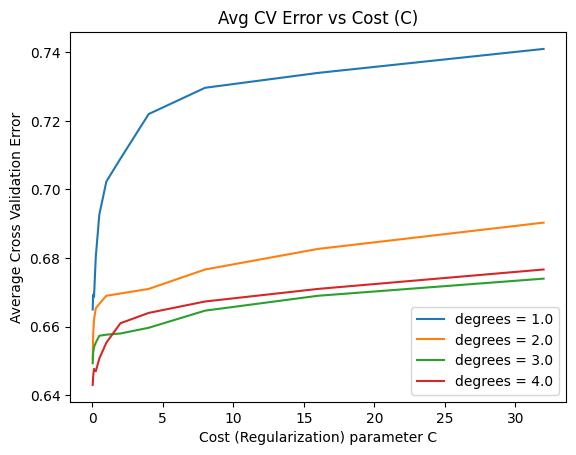

In [37]:
plt.plot(d_c_scores_avg_arr[0:11,1], d_c_scores_avg_arr[0:11,2], label="degrees = {}".format(d_c_scores_avg_arr[0,0]))
plt.plot(d_c_scores_avg_arr[11:22,1], d_c_scores_avg_arr[11:22,2], label="degrees = {}".format(d_c_scores_avg_arr[11,0]))
plt.plot(d_c_scores_avg_arr[22:33,1], d_c_scores_avg_arr[22:33,2], label="degrees = {}".format(d_c_scores_avg_arr[22,0]))
plt.plot(d_c_scores_avg_arr[33:44,1], d_c_scores_avg_arr[33:44,2], label="degrees = {}".format(d_c_scores_avg_arr[33,0]))
plt.xlabel('Cost (Regularization) parameter C')
plt.ylabel('Average Cross Validation Error')
plt.title('Avg CV Error vs Cost (C)')
# plt.xscale('log')
# plt.xticks(d_c_scores_avg_arr[0:11,1], rotation='vertical')
# plt.tick_params(axis='x', which='major', pad=10)
plt.legend()
plt.show()

In [14]:
best_score = np.min(d_c_scores_avg_arr[:,2])
best_c_row = np.where(d_c_scores_avg_arr[:,2]== best_score)[0]
best_c = d_c_scores_avg_arr[best_c_row,1][0]
best_d = int(d_c_scores_avg_arr[best_c_row,0][0])
print("C* = {}, d* = {}".format(best_c, best_d))

C* = 0.03125, d* = 4


In [23]:
# get test errors for all possible degrees using C*
from sklearn.metrics import accuracy_score
errors = []
for d in degrees:
  mySVM_model = svm.SVC(kernel='poly', C=best_c, degree=d)
  mySVM_model.fit(x_train, y_train)
  svm_y_predicted = mySVM_model.predict(x_test)
  errors.append(accuracy_score(y_test, svm_y_predicted))

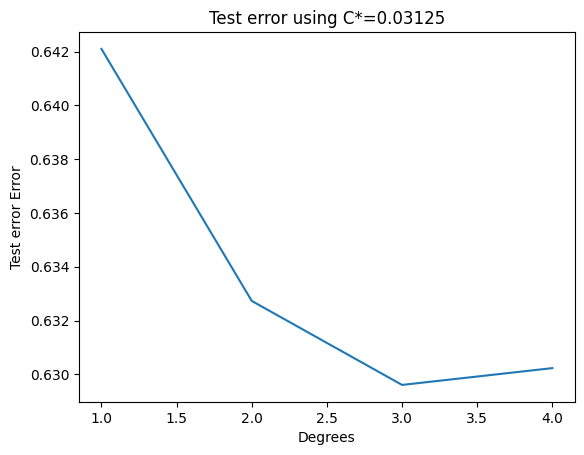

In [26]:
plt.plot(degrees, errors)
plt.xlabel('Degrees')
plt.ylabel('Test error Error')
plt.title("Test error using C*={}".format(best_c))
plt.show()

In [29]:
scores = [row[2] for row in c_d_scores[:4]]

In [33]:
for i in range(len(scores)):
  scores[i] = np.mean(scores[i])

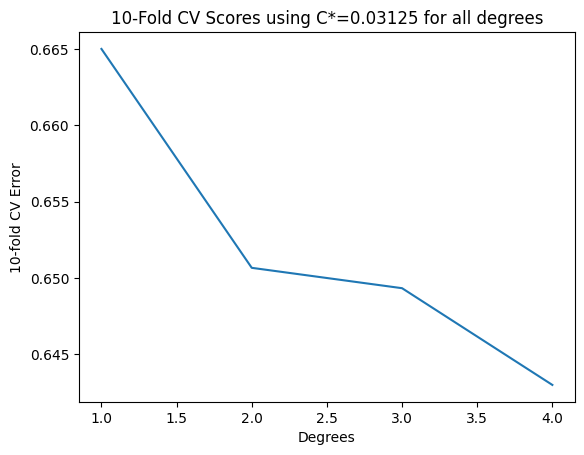

In [36]:
plt.plot(degrees, scores)
plt.xlabel('Degrees')
plt.ylabel('10-fold CV Error')
plt.title("10-Fold CV Scores using C*={} for all degrees".format(best_c))
plt.show()

In [ ]:
cross_val_score(mySVM_model, X=x_train, y=y_train, cv=kf, verbose=1)

array([0.61      , 0.63666667, 0.66666667, 0.62      , 0.64666667,
       0.66      , 0.67      , 0.60333333, 0.63      , 0.68666667])

In [27]:
c_d_scores

[(0.03125,
  1,
  array([0.63      , 0.64333333, 0.68333333, 0.65333333, 0.67333333,
         0.67      , 0.69333333, 0.64      , 0.65666667, 0.70666667])),
 (0.03125,
  2,
  array([0.61666667, 0.65      , 0.67666667, 0.63333333, 0.65      ,
         0.66333333, 0.67666667, 0.60666667, 0.63666667, 0.69666667])),
 (0.03125,
  3,
  array([0.61      , 0.65      , 0.68      , 0.63666667, 0.65      ,
         0.66      , 0.67333333, 0.60666667, 0.64      , 0.68666667])),
 (0.03125,
  4,
  array([0.61      , 0.63666667, 0.66666667, 0.62      , 0.64666667,
         0.66      , 0.67      , 0.60333333, 0.63      , 0.68666667])),
 (0.0625,
  1,
  array([0.63666667, 0.65      , 0.7       , 0.66333333, 0.67333333,
         0.67      , 0.69333333, 0.64      , 0.66333333, 0.70333333])),
 (0.0625,
  2,
  array([0.62333333, 0.65333333, 0.68333333, 0.64      , 0.65666667,
         0.66666667, 0.68333333, 0.62      , 0.64666667, 0.70333333])),
 (0.0625,
  3,
  array([0.61666667, 0.65      , 0.68      , 